# 데이터 분석

데이터 확인
- info
- shape
- dtypes
- describe
- isna().sum()

데이터값 확인
- df.corr()
- pd.plotting.scatter_matrix(df)
- df.plot() - 값의 스케일이 너무 달라서 표현이 잘 안되면 df.drop(columns=['Ash']).plot()
- df.hist()
- df.boxplot() - 이상치 확인

그래프 그리기
- 카테고리 - pie(), bar(), barh()
- 분포 - plot()

카테고리 그룹별로
- df.groupby(컬럼).mean()
- df.groupby(컬럼).aggregate(['mean', 'max'])

컬럼 2개의 관계
- df.plot.scatter

원핫인코딩

x, y분리

score 측정

어떤 변수가 큰영향이 있나

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 데이터 읽어들이기
df = pd.read_csv('./datasets/wine/wine.data', encoding='cp949', header=None)
df.shape

(178, 14)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
df.columns

Index(['Country', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [25]:
df.columns = ['Country','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [ ]:
# 데이터 컬럼 이름 바꾸기
df[0].unique

In [18]:
# describe - 통계치 보기

In [ ]:
# isna().sum() - 누락값 보기

# 모델 그리고 스코어
1. 예측 모델 - Regression Model from sklearn
2. 분류 모델 - Classification Model from sklearn

In [22]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop(columns='Y')
Y = df['Y']

In [ ]:
model = LogisticRegression().fit(X, Y)
model.score(X, Y)

# knn - k 최근접 이웃 모델

분류와 예측에 사용할 수 있는 모델
입력데이터와 가장 값이 가까운 k개의 샘플을 찾아 -> 평균으로 목표 예측

알콜 도수로 와인 원산지 예측

In [28]:
x = df['Alcohol']
y = df['Country']

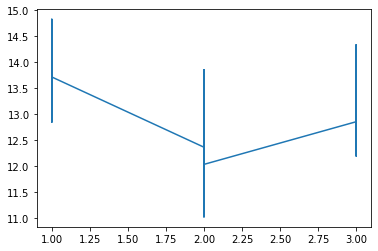

In [29]:
plt.plot(y, x)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# 입력데이터 x는 2차원이어야 한다. (데이터갯수, 특징수)
# 출력데이터 y는 1, 2차원 모두 가능합니다.
x_2d = np.array(x).reshape(-1, 1)
model = KNeighborsClassifier(n_neighbors=5).fit(x_2d, y)

In [37]:
model.score(x_2d, y)

0.7584269662921348

In [39]:
model.predict([[11]])

array([2], dtype=int64)

In [42]:
df.plot.scatter(x='Country', y='Alcohol', c='Y', , colormap='viridis')

SyntaxError: invalid syntax (<ipython-input-42-5ad921524d2e>, line 1)

In [45]:
X = df[['Hue', 'Alcohol']]
Y = df['Country']
model = KNeighborsClassifier(5).fit(X, Y)
model.score(X, Y)

0.9325842696629213

In [46]:
model.predict([[0.5, 15]])

array([1], dtype=int64)